data preprocessing

In [66]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
from sklearn.model_selection import train_test_split

In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D , MaxPooling1D , Embedding
from tensorflow.keras.models import Model


In [70]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [71]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


remove the garbage coloumn

In [72]:
df = df.drop(["Unnamed: 2" , "Unnamed: 3" , "Unnamed: 4"], axis =1)

In [73]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


rename the column

In [74]:
df.columns =['labels' , 'data']

In [75]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


create new column called b_lables and assing 0 and 1 to it

In [76]:
df['b_lables'] = df['labels'].map({'ham': 0, "spam": 1})
y = df['b_lables'].values

In [77]:
df.head()

,labels,data,b_lables
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [78]:
#split the data
x_train , x_test , y_train , y_test = train_test_split(df['data'] , y , test_size =0.33)

In [79]:
#convert sentences to sequence
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

In [80]:
x_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [81]:
sequence_train[0]

[101, 119, 37, 519, 119, 37, 620, 22, 175, 120, 3, 11, 1107, 9, 2261]

In [82]:
word2idx = tokenizer.word_index
v = len(word2idx)
print("total number of unique tokens are :" ,v)

total number of unique tokens are : 7191


In [83]:
data_train = pad_sequences(sequence_train)
print('shape of the data train tensor :' , data_train.shape)

shape of the data train tensor : (3733, 189)


In [84]:
data_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [85]:
len(data_train[0])

189

In [86]:
T = data_train.shape[1]

In [87]:
print(T)

189


In [88]:
data_test = pad_sequences(sequence_test , maxlen=T)
print("shape of the test data tensor :" ,data_test.shape)

shape of the test data tensor : (1839, 189)


building the model

In [89]:
D = 20

In [90]:
i =Input(shape =(T,))

In [91]:
#embedding layer
x = Embedding(v+1 , D)(i)

In [92]:
#first cnn layer
x = Conv1D(32 , 3 , activation='relu')(x)
x = MaxPooling1D(3)(x)

In [96]:
x = Conv1D(128 , 3 , activation='relu')(x)
x = GlobalMaxPooling1D()(x)

In [97]:
x = Dense(1 , activation='sigmoid')(x)


In [98]:
model = Model(i,x)

In [99]:
#compile the model
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [100]:
#train the model
r = model.fit(x = data_train, y= y_train , epochs = 5 , validation_data = (data_test , y_test))

Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8711 - loss: 0.4256 - val_accuracy: 0.8646 - val_loss: 0.2493
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.9287 - loss: 0.1550 - val_accuracy: 0.9821 - val_loss: 0.0588
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9933 - loss: 0.0237 - val_accuracy: 0.9875 - val_loss: 0.0562
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9964 - loss: 0.0081 - val_accuracy: 0.9875 - val_loss: 0.0556
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9875 - val_loss: 0.0898


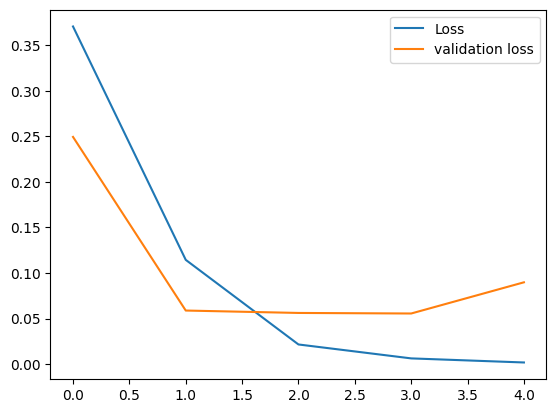

In [102]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label ='Loss')
plt.plot(r.history['val_loss'], label ='validation loss')
plt.legend()
plt.show()

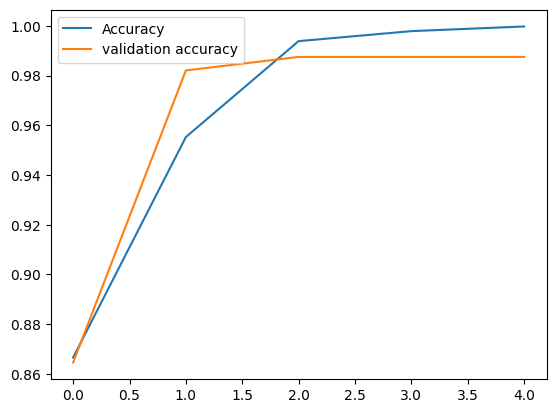

In [103]:
#accuracy per iteration
plt.plot(r.history['accuracy'], label ='Accuracy')
plt.plot(r.history['val_accuracy'], label ='validation accuracy')
plt.legend()
plt.show()